## Single Layer Perceptron 

- The idea is the alogorithm is able to find a set of ideal weights, so that the network correctly classifies the input. For this in the response is not expected response, a weight adjusted is performed.
- **Network Features**
- Linear classifier,i.e., performs classifications of linearly separsble sets (labeled in this eexample as -1 and 1).
- Supervised Learning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# Inputs and labels (label -1 => blue and label 1 => red)

x = [
    [0.72,0.82,-1],
    [0.91,-0.69,-1],
    [0.03,0.93,-1],
    [0.12,0.25,-1],
    [0.96,0.47,-1],
    [0.8,-0.75,-1],
    [0.46,0.98,-1],
    [0.66,0.24,-1],
    [0.72,-0.15,-1],
    [0.35,0.01,-1],
    [-0.11,0.1,1],
    [0.31,-0.96,1],
    [0.0,-0.26,1],
    [-0.43,-0.65,1],
    [0.57,-0.97,1],
    [-0.72,-0.64,1],
    [-0.25,-0.43,1],
    [-0.12,-0.9,1],
    [-0.58,0.62,1],
    [-0.77,-0.76,1]
]

df = pd.DataFrame(x, columns=['x0','x1','y'])
df.head()

,x0,x1,y
0,0.72,0.82,-1
1,0.91,-0.69,-1
2,0.03,0.93,-1
3,0.12,0.25,-1
4,0.96,0.47,-1


In [5]:
df.tail()

,x0,x1,y
15,-0.72,-0.64,1
16,-0.25,-0.43,1
17,-0.12,-0.90,1
18,-0.58,0.62,1
19,-0.77,-0.76,1


In [6]:
mylist = ['r' if i == 1 else 'b' for i in df['y']]
len(mylist)

20

In [7]:
mylist

['b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r']

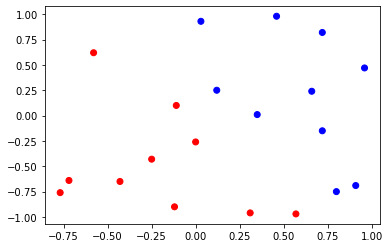

In [8]:
plt.scatter(df['x0'], df['x1'], c = ['r' if i ==1 else 'b' for i in df['y']])

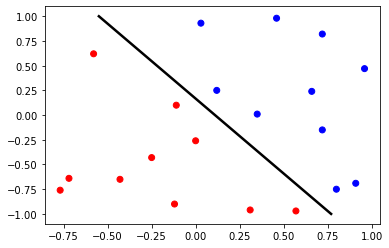

In [9]:
plt.scatter(df['x0'],df['x1'], c = ['r' if i == 1 else 'b' for i in df['y']])
# plot the black line, that is, we want to learn the black line as faithfully as possible
plt.plot([0.77,-0.55],[-1,1],color = 'k',linestyle = '-',linewidth = 2.5)

### Logistic regression Loss function and Gradients: 
\begin{equation*} Log Loss = - \sum y_i log(p_i) + (1-y_i) log(1 - p_i)\end{equation*}
* *The derivative(slope/gradient) for Loss function of Logistic Regression is:*    **x * (ypredicted - yactual)**
* *The weight will then be upated as:*    **weight = weight - learningRate * gradient**
* *Thus,* **weight = weight - learning rate *  x * (ypredicted - yactual)**

### Steps:
1. Initialize random weights (w) and based on that draw the classification line
2. Iterate from 1 to epochs
3. ----Iterate for all points in data (x)
4. --------**Predict** the current point  (ypredicted = w0x0 + w1x1 + bias)
5. --------If successfully predicted, go to 7
6. --------If not successfully predicted,  **update weights**
7. --------Next point, go to 4
8. ----If all points predicted correctly, break
9. ----Next iteration

In [34]:
# y = 
def predict(point,w,bias,threshold):
    sum = bias
    
    for j in range(0,len(point)-1):
        sum += point[j] * w[j]
        
        if sum > threshold:
            y = 1
        else:
            y = -1
            
            return y

**weight = weight - learning rate *  x * (ypredicted - yactual)**

For the perceptron, we update the weights only when 'ypredicted' is not equal to 'yactual'
* In our example above, 'yactual' can be either -1 or +1
* So, ypredicted - yacutal = -yactual - yactual = -2* yactual
* Therefore, weight = weight - (learning rate) *  x* (-2)* yacutal = weight + 2* (learning rate) * x * yactual
* Or, weight = weight + (learning rate) * x * yactual

Similarly, [bias = bias - (learning rate) *  (predictions - actual)]  becomes
* bias = bias + (learning rate) * actual

In [35]:
def updateweights(point,w,bias):
    for j in range(0,len(w)):
        w[j] = w[j] + (learning_rate * point[2] * point[j])
        
    bias = bias + learning_rate * 2 * point[2]
    return w,bias

The Single-Layer percepton settings - The Weights are initialize as zeros, the Threshold and Bias are respectively set to 0 and 1

In [36]:
w = [0,0] # weights
bias = 1
threshold = 0
learning_rate = 1
max_epochs = 100

In [37]:
print('starting weights:',str(w))
for k in range(1,max_epochs):
    hits = 0
    print("\n------------------------EPOCH"+str(k)+ "----------------------------")
    for i in range(0,len(x)):
        correcctlypredicted = False
        printStr = "point" + str(i) + ":" + str(x[i]) + "weights :"+ str(w) + "Bias:" + str(bias)
        ypredicted = predict(x[i],w,bias,threshold)
        
        #  Update the weights if output does not  match with desired input
        if ypredicted == x[i][2]:# e.g: if x[0] = [0.72,0.96,-1] then x[0][2] is the yactaul
            hits += 1
            correctlypredicted = True
            print(printStr + "correctly satisfied")
        else:
            print(printStr + "Incorrectly satisfied")
            w,bias = updateweights(x[i],w,bias)
            print("updated weights:",str(w),"updated bias:",bias)
            
            if hits == len(x):
                print("\n------------------------------------------------------------------------------------------")
                print("\nFunctionality Learned with "+ str(k)+"iterations!")
                break;
            else:
                print("\n-------------------------------------------------------------------------------------------")
                print("\nFunctionality Not Learned!")
print("\nDone!\n")    

starting weights: [0, 0]

------------------------EPOCH1----------------------------
point0:[0.72, 0.82, -1]weights :[0, 0]Bias:1Incorrectly satisfied
updated weights: [-0.72, -0.82] updated bias: -1

-------------------------------------------------------------------------------------------

Functionality Not Learned!
point1:[0.91, -0.69, -1]weights :[-0.72, -0.82]Bias:-1correctly satisfied
point2:[0.03, 0.93, -1]weights :[-0.72, -0.82]Bias:-1correctly satisfied
point3:[0.12, 0.25, -1]weights :[-0.72, -0.82]Bias:-1correctly satisfied
point4:[0.96, 0.47, -1]weights :[-0.72, -0.82]Bias:-1correctly satisfied
point5:[0.8, -0.75, -1]weights :[-0.72, -0.82]Bias:-1correctly satisfied
point6:[0.46, 0.98, -1]weights :[-0.72, -0.82]Bias:-1correctly satisfied
point7:[0.66, 0.24, -1]weights :[-0.72, -0.82]Bias:-1correctly satisfied
point8:[0.72, -0.15, -1]weights :[-0.72, -0.82]Bias:-1correctly satisfied
point9:[0.35, 0.01, -1]weights :[-0.72, -0.82]Bias:-1correctly satisfied
point10:[-0.11, 0.1,


Functionality Not Learned!
point19:[-0.77, -0.76, 1]weights :[-106.8699999999999, -92.41000000000014]Bias:119Incorrectly satisfied
updated weights: [-107.6399999999999, -93.17000000000014] updated bias: 121

-------------------------------------------------------------------------------------------

Functionality Not Learned!

------------------------EPOCH20----------------------------
point0:[0.72, 0.82, -1]weights :[-107.6399999999999, -93.17000000000014]Bias:121correctly satisfied
point1:[0.91, -0.69, -1]weights :[-107.6399999999999, -93.17000000000014]Bias:121Incorrectly satisfied
updated weights: [-108.5499999999999, -92.48000000000015] updated bias: 119

-------------------------------------------------------------------------------------------

Functionality Not Learned!
point2:[0.03, 0.93, -1]weights :[-108.5499999999999, -92.48000000000015]Bias:119Incorrectly satisfied
updated weights: [-108.5799999999999, -93.41000000000015] updated bias: 117

-------------------------------

point6:[0.46, 0.98, -1]weights :[-223.30000000000084, -186.71000000000032]Bias:233correctly satisfied
point7:[0.66, 0.24, -1]weights :[-223.30000000000084, -186.71000000000032]Bias:233Incorrectly satisfied
updated weights: [-223.96000000000083, -186.95000000000033] updated bias: 231

-------------------------------------------------------------------------------------------

Functionality Not Learned!
point8:[0.72, -0.15, -1]weights :[-223.96000000000083, -186.95000000000033]Bias:231Incorrectly satisfied
updated weights: [-224.68000000000083, -186.80000000000032] updated bias: 229

-------------------------------------------------------------------------------------------

Functionality Not Learned!
point9:[0.35, 0.01, -1]weights :[-224.68000000000083, -186.80000000000032]Bias:229Incorrectly satisfied
updated weights: [-225.03000000000083, -186.81000000000031] updated bias: 227

-------------------------------------------------------------------------------------------

Functionality N

updated weights: [-338.6300000000028, -281.7299999999999] updated bias: 353

-------------------------------------------------------------------------------------------

Functionality Not Learned!
point13:[-0.43, -0.65, 1]weights :[-338.6300000000028, -281.7299999999999]Bias:353Incorrectly satisfied
updated weights: [-339.0600000000028, -282.3799999999999] updated bias: 355

-------------------------------------------------------------------------------------------

Functionality Not Learned!
point14:[0.57, -0.97, 1]weights :[-339.0600000000028, -282.3799999999999]Bias:355Incorrectly satisfied
updated weights: [-338.4900000000028, -283.3499999999999] updated bias: 357

-------------------------------------------------------------------------------------------

Functionality Not Learned!
point15:[-0.72, -0.64, 1]weights :[-338.4900000000028, -283.3499999999999]Bias:357Incorrectly satisfied
updated weights: [-339.2100000000028, -283.9899999999999] updated bias: 359

---------------------

updated weights: [-453.96000000000504, -378.4999999999987] updated bias: 485

-------------------------------------------------------------------------------------------

Functionality Not Learned!
point19:[-0.77, -0.76, 1]weights :[-453.96000000000504, -378.4999999999987]Bias:485Incorrectly satisfied
updated weights: [-454.730000000005, -379.2599999999987] updated bias: 487

-------------------------------------------------------------------------------------------

Functionality Not Learned!

------------------------EPOCH81----------------------------
point0:[0.72, 0.82, -1]weights :[-454.730000000005, -379.2599999999987]Bias:487correctly satisfied
point1:[0.91, -0.69, -1]weights :[-454.730000000005, -379.2599999999987]Bias:487Incorrectly satisfied
updated weights: [-455.64000000000505, -378.5699999999987] updated bias: 485

-------------------------------------------------------------------------------------------

Functionality Not Learned!
point2:[0.03, 0.93, -1]weights :[-455.640

In [38]:
print('Starting weights: ', str(w))
for k in range(1, max_epochs):
    hits = 0
    print("\n------------------------- EPOCH "+str(k)+" ------------------------- ")
    for i in range(0,len(x)):
        correctlyPredicted = False
        printStr = "Point "+ str(i) + ":" +str(x[i]) + " Weights:"+str(w)+ ' Bias:' + str(bias)
        ypredicted = predict(x[i], w, bias, threshold)
        
        # Update the Weights if the output does not match with the Desired output
        if ypredicted == x[i][2]:  # e.g. if  x[0] = [0.72,0.82,-1]... then x[0][2] is the yactual
            hits += 1
            correctlyPredicted = True   
            print(printStr + " Correctly classified")
        else:
            print(printStr + " Incorrectly classified")
            w, bias = updateweights(x[i], w, bias)
            print('Updated weights: ', str(w), "  Updated bias:", bias)

    if hits == len(x):
        print("\n---------------------------------------------------------------")
        print("\nFunctionality learned with "+str(k)+" iterations!")
        break;
    else:
        print("\n---------------------------------------------------------------")
        print("\nFunctionality not learned!")

print("\nDone!\n")

Starting weights:  [-562.8400000000056, -468.36999999999756]

------------------------- EPOCH 1 ------------------------- 
Point 0:[0.72, 0.82, -1] Weights:[-562.8400000000056, -468.36999999999756] Bias:601 Correctly classified
Point 1:[0.91, -0.69, -1] Weights:[-562.8400000000056, -468.36999999999756] Bias:601 Incorrectly classified
Updated weights:  [-563.7500000000056, -467.67999999999756]   Updated bias: 599
Point 2:[0.03, 0.93, -1] Weights:[-563.7500000000056, -467.67999999999756] Bias:599 Incorrectly classified
Updated weights:  [-563.7800000000055, -468.60999999999757]   Updated bias: 597
Point 3:[0.12, 0.25, -1] Weights:[-563.7800000000055, -468.60999999999757] Bias:597 Incorrectly classified
Updated weights:  [-563.9000000000055, -468.85999999999757]   Updated bias: 595
Point 4:[0.96, 0.47, -1] Weights:[-563.9000000000055, -468.85999999999757] Bias:595 Correctly classified
Point 5:[0.8, -0.75, -1] Weights:[-563.9000000000055, -468.85999999999757] Bias:595 Incorrectly classifie

Point 1:[0.91, -0.69, -1] Weights:[-727.8500000000039, -604.3799999999936] Bias:775 Incorrectly classified
Updated weights:  [-728.7600000000039, -603.6899999999936]   Updated bias: 773
Point 2:[0.03, 0.93, -1] Weights:[-728.7600000000039, -603.6899999999936] Bias:773 Incorrectly classified
Updated weights:  [-728.7900000000038, -604.6199999999935]   Updated bias: 771
Point 3:[0.12, 0.25, -1] Weights:[-728.7900000000038, -604.6199999999935] Bias:771 Incorrectly classified
Updated weights:  [-728.9100000000038, -604.8699999999935]   Updated bias: 769
Point 4:[0.96, 0.47, -1] Weights:[-728.9100000000038, -604.8699999999935] Bias:769 Correctly classified
Point 5:[0.8, -0.75, -1] Weights:[-728.9100000000038, -604.8699999999935] Bias:769 Incorrectly classified
Updated weights:  [-729.7100000000038, -604.1199999999935]   Updated bias: 767
Point 6:[0.46, 0.98, -1] Weights:[-729.7100000000038, -604.1199999999935] Bias:767 Correctly classified
Point 7:[0.66, 0.24, -1] Weights:[-729.710000000003

Updated weights:  [-862.6900000000024, -715.4699999999896]   Updated bias: 911
Point 16:[-0.25, -0.43, 1] Weights:[-862.6900000000024, -715.4699999999896] Bias:911 Incorrectly classified
Updated weights:  [-862.9400000000024, -715.8999999999895]   Updated bias: 913
Point 17:[-0.12, -0.9, 1] Weights:[-862.9400000000024, -715.8999999999895] Bias:913 Incorrectly classified
Updated weights:  [-863.0600000000024, -716.7999999999895]   Updated bias: 915
Point 18:[-0.58, 0.62, 1] Weights:[-863.0600000000024, -716.7999999999895] Bias:915 Incorrectly classified
Updated weights:  [-863.6400000000025, -716.1799999999895]   Updated bias: 917
Point 19:[-0.77, -0.76, 1] Weights:[-863.6400000000025, -716.1799999999895] Bias:917 Incorrectly classified
Updated weights:  [-864.4100000000025, -716.9399999999895]   Updated bias: 919

---------------------------------------------------------------

Functionality not learned!

------------------------- EPOCH 54 ------------------------- 
Point 0:[0.72, 0.82

Updated weights:  [-1021.4300000000009, -844.5299999999847]   Updated bias: 1073
Point 13:[-0.43, -0.65, 1] Weights:[-1021.4300000000009, -844.5299999999847] Bias:1073 Incorrectly classified
Updated weights:  [-1021.8600000000008, -845.1799999999847]   Updated bias: 1075
Point 14:[0.57, -0.97, 1] Weights:[-1021.8600000000008, -845.1799999999847] Bias:1075 Incorrectly classified
Updated weights:  [-1021.2900000000008, -846.1499999999847]   Updated bias: 1077
Point 15:[-0.72, -0.64, 1] Weights:[-1021.2900000000008, -846.1499999999847] Bias:1077 Incorrectly classified
Updated weights:  [-1022.0100000000008, -846.7899999999847]   Updated bias: 1079
Point 16:[-0.25, -0.43, 1] Weights:[-1022.0100000000008, -846.7899999999847] Bias:1079 Incorrectly classified
Updated weights:  [-1022.2600000000008, -847.2199999999847]   Updated bias: 1081
Point 17:[-0.12, -0.9, 1] Weights:[-1022.2600000000008, -847.2199999999847] Bias:1081 Incorrectly classified
Updated weights:  [-1022.3800000000008, -848.11

In [40]:
w,bias

([-1126.1499999999976, -932.6799999999815], 1195)

### Adding the scatter plot at each step to see the progress:
1. Initialize random weights and based on that draw the classification line
2. Iterate from 1 to max_iterations
3. ----Iterate for all points in data
4. --------**Predict** the current point
5. --------If successfully predicted, **plot graph**, go to 7
6. --------If not successfully predicted,  **update weights**, **plot graph**
7. --------Next point, go to 4
8. ----If all points predicted correctly, break
9. ----Next iteration

In [51]:
def createplot(point,w,correctlypredicted):
    plt.clf() # clear figure
    plt.title("Iteration %s\n " %(str(k)))
    plt.grid(False)
    plt.xlim(-1,1) # set x - axis
    plt.ylim(-1,1) # set y-axis
    
    PlotLearningLine = True
    
    # ax + by + c = 0   => w[0]*x + w[1]*y + bias = 0 ---- from the slides.... a is w[0], b is w[1], c is bias
    if w[1] !=0:
        xA = 1
        xB = -1
        yA = (-(w[0] * xA - bias) / w[1])
        yB = (-(w[0] * xB - bias) / w[2])
        
        elif (w[0] !=0):
            yA = 1
            yB = -1
            xA = (-(w[1] * yA - bias) / w[0])
            xB = (-(w[1] * yB - bias) / w[0])
            
    else:
        print("Not plotting the learning line")
        PlotLearningLine = False
        
        #plot the black line that we want to learn the black line is faithfully possible 
        plt.plot([xA,xB],[yA,yB],color = 'g',linestyle = '-', linewidth = 2) # Learning Line (decision Boundary)
        
        plt.scatter(df['x0'],df['x1'], c = ['r' if i == 1 else 'b' for i in df['y']])
        if correctlypredicted1:
            plt.plot(point[0],point[1],'go',markersize = 15,alpha = .5) # 
        else:
            plt.plot(point[0],point[1],'mo',markersize = 30,alpha = .5)
            
        plt.show()
        plt.pause(0.05)

SyntaxError: invalid syntax (<ipython-input-51-414b6a7169f9>, line 17)

In [52]:
def createPlot(point, w, bias, correctlyPredicted):
    plt.clf() # Clear figure
    plt.title('Iteration %s\n' % (str(k)))
    plt.grid(False) # Plot a grid
    plt.xlim(-1,1) # Set x-axis limits
    plt.ylim(-1,1) # Set y-axis limits
    
    plotLearningLine = True
    # ax + by + c = 0   => w[0]*x + w[1]*y + bias = 0 ---- from the slides.... a is w[0], b is w[1], c is bias
    if w[1] != 0:
        xA = 1 
        xB = -1
        yA = (- w[0] * xA - bias) / w[1]
        yB = (- w[0] * xB - bias) / w[1]
    elif (w[0] !=0):
        yA = 1
        yB = -1
        xA = (- w[1] * yA - bias) / w[0]
        xB = (- w[1] * yB - bias) / w[0]
    else:
        print("Not plotting the Learning line")
        plotLearningLine = False

    # Plot the black line, that is, we want to learn the black line as faithfully as possible
    plt.plot([0.77, -0.55], [-1, 1], color='k', linestyle='-', linewidth=1)

    
    if plotLearningLine:
        plt.plot([xA, xB], [yA, yB], color='g', linestyle='-', linewidth=2)  # Learning line (Decision Boundary)

    #plt.plot(x0blue, x1blue, 'bo')  # Plot blue points
    #plt.plot(x0red, x1red, 'ro')    # Plot red points
    plt.scatter(df['x0'], df['x1'], c=['r' if i==1 else 'b' for i in df['y']])
    if correctlyPredicted:
        plt.plot(point[0], point[1], 'go', markersize=15, alpha=.5)  # Highlight current point with with green color
    else:  
        plt.plot(point[0], point[1], 'mo', markersize=30, alpha=.5)  # Highlight current point with magenta color
        
    plt.show()
    plt.pause(0.05) # We were able to control the loop time, so a figure will be updated and displayed


In [53]:
w = [0,0] #weights 
bias = 1
threshold = 0
learning_rate = 1
max_epoch = 100
needplot = True


-----------------------------EPOCH1---------------------------------
Point 0:[0.72, 0.82, -1] Weights:[-0.72, -0.82] Correctly classified


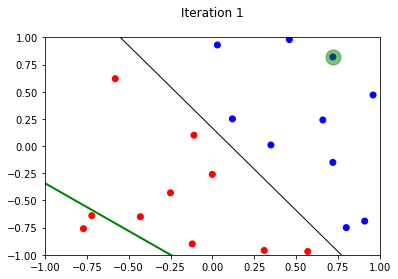

Point 1:[0.91, -0.69, -1] Weights:[-0.72, -0.82] Correctly classified


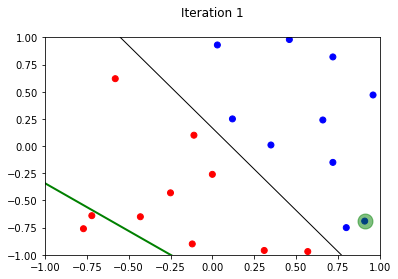

Point 2:[0.03, 0.93, -1] Weights:[-0.72, -0.82] Correctly classified


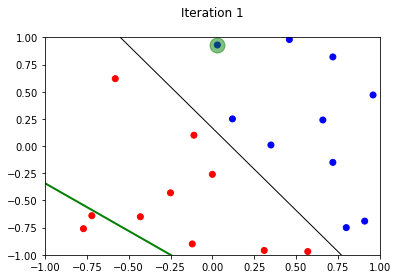

Point 3:[0.12, 0.25, -1] Weights:[-0.72, -0.82] Correctly classified


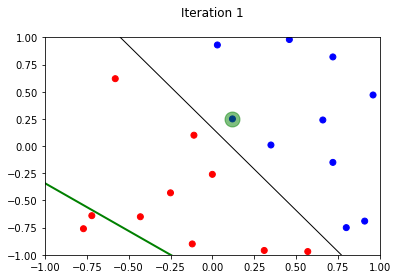

Point 4:[0.96, 0.47, -1] Weights:[-0.72, -0.82] Correctly classified


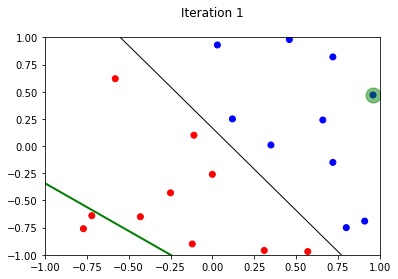

Point 5:[0.8, -0.75, -1] Weights:[-0.72, -0.82] Correctly classified


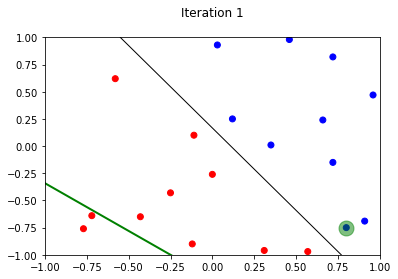

Point 6:[0.46, 0.98, -1] Weights:[-0.72, -0.82] Correctly classified


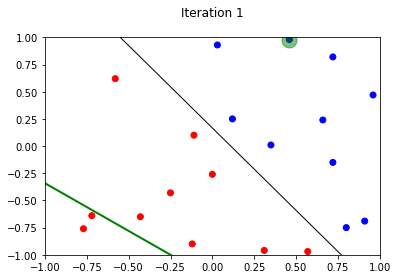

Point 7:[0.66, 0.24, -1] Weights:[-0.72, -0.82] Correctly classified


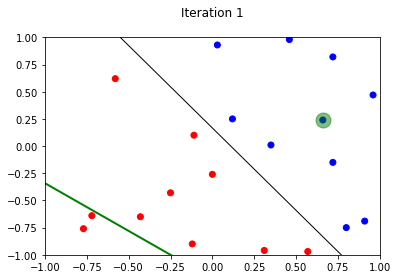

Point 8:[0.72, -0.15, -1] Weights:[-0.72, -0.82] Correctly classified


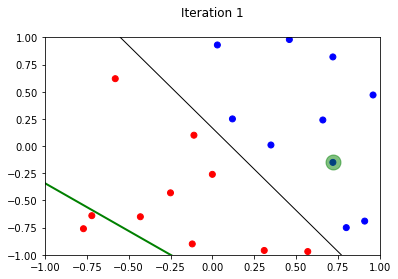

Point 9:[0.35, 0.01, -1] Weights:[-0.72, -0.82] Correctly classified


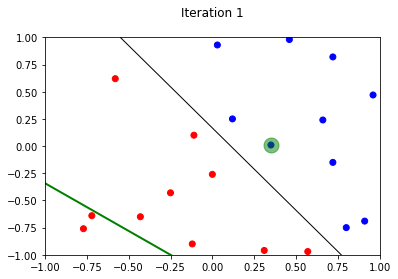

Point 10:[-0.11, 0.1, 1] Weights:[-0.72, -0.82] Incorrectly classified


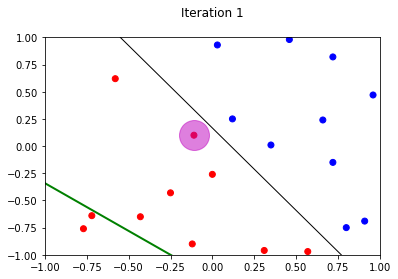

Updated weights:  [-0.83, -0.72]
Point 11:[0.31, -0.96, 1] Weights:[-0.83, -0.72] Incorrectly classified


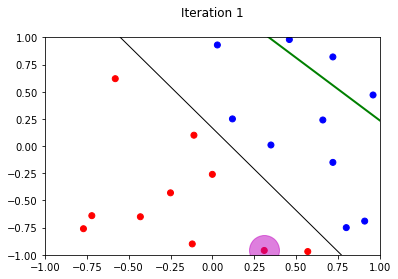

Updated weights:  [-0.52, -1.68]
Point 12:[0.0, -0.26, 1] Weights:[-0.52, -1.68] Incorrectly classified


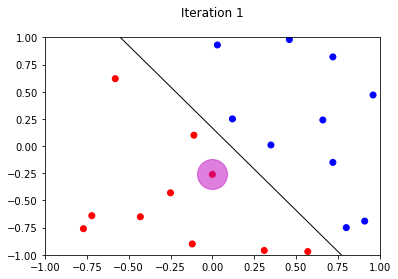

Updated weights:  [-0.52, -1.94]
Point 13:[-0.43, -0.65, 1] Weights:[-0.52, -1.94] Incorrectly classified


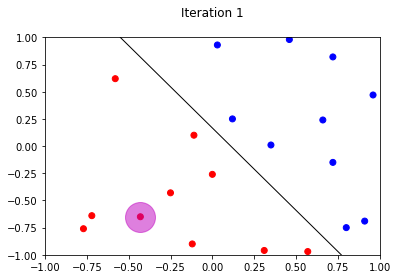

Updated weights:  [-0.95, -2.59]
Point 14:[0.57, -0.97, 1] Weights:[-0.95, -2.59] Incorrectly classified


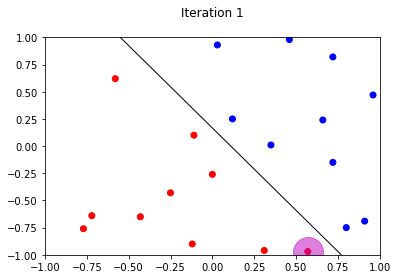

Updated weights:  [-0.38, -3.5599999999999996]
Point 15:[-0.72, -0.64, 1] Weights:[-0.38, -3.5599999999999996] Incorrectly classified


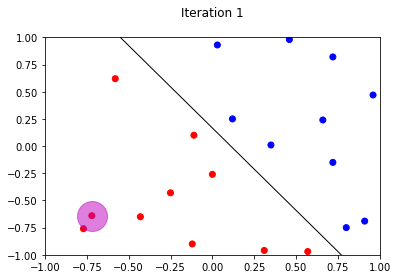

Updated weights:  [-1.1, -4.199999999999999]
Point 16:[-0.25, -0.43, 1] Weights:[-1.1, -4.199999999999999] Incorrectly classified


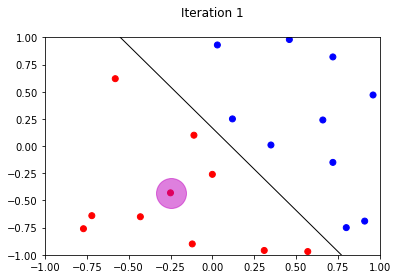

Updated weights:  [-1.35, -4.629999999999999]
Point 17:[-0.12, -0.9, 1] Weights:[-1.35, -4.629999999999999] Incorrectly classified


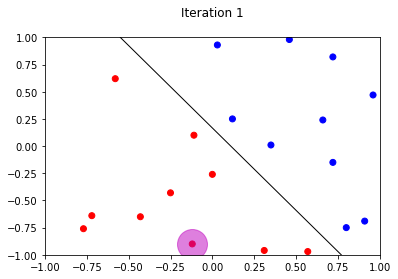

Updated weights:  [-1.4700000000000002, -5.529999999999999]
Point 18:[-0.58, 0.62, 1] Weights:[-1.4700000000000002, -5.529999999999999] Incorrectly classified


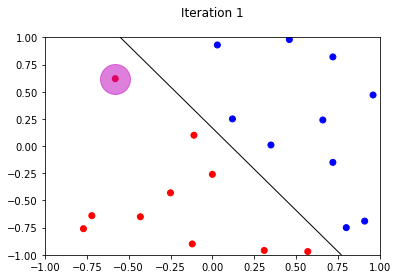

Updated weights:  [-2.0500000000000003, -4.909999999999999]
Point 19:[-0.77, -0.76, 1] Weights:[-2.0500000000000003, -4.909999999999999] Incorrectly classified


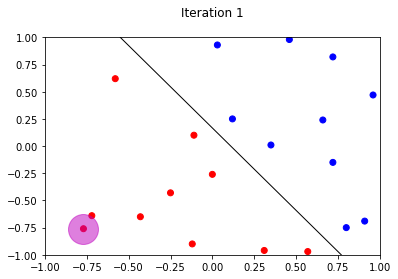

Updated weights:  [-2.8200000000000003, -5.669999999999999]

---------------------------------------------------------------

Functionality not learned!

-----------------------------EPOCH2---------------------------------
Point 0:[0.72, 0.82, -1] Weights:[-2.8200000000000003, -5.669999999999999] Incorrectly classified


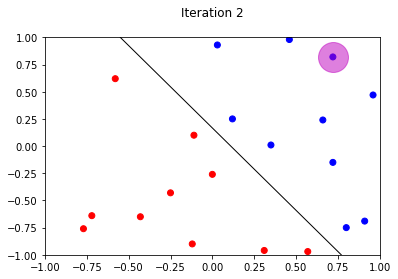

Updated weights:  [-3.54, -6.489999999999999]
Point 1:[0.91, -0.69, -1] Weights:[-3.54, -6.489999999999999] Incorrectly classified


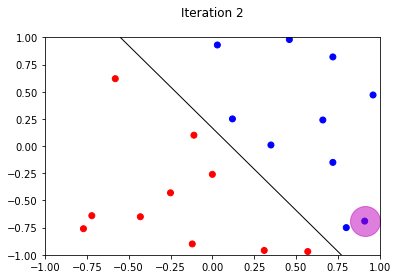

Updated weights:  [-4.45, -5.799999999999999]
Point 2:[0.03, 0.93, -1] Weights:[-4.45, -5.799999999999999] Incorrectly classified


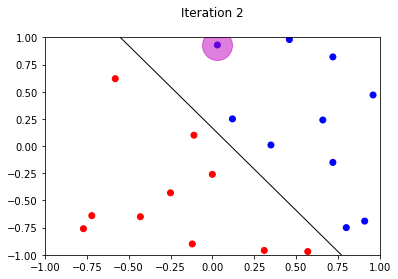

Updated weights:  [-4.48, -6.729999999999999]
Point 3:[0.12, 0.25, -1] Weights:[-4.48, -6.729999999999999] Incorrectly classified


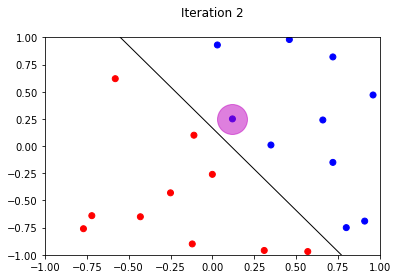

Updated weights:  [-4.6000000000000005, -6.979999999999999]
Point 4:[0.96, 0.47, -1] Weights:[-4.6000000000000005, -6.979999999999999] Incorrectly classified


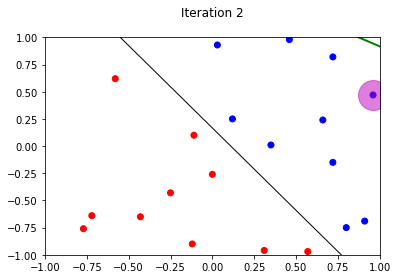

Updated weights:  [-5.5600000000000005, -7.449999999999998]
Point 5:[0.8, -0.75, -1] Weights:[-5.5600000000000005, -7.449999999999998] Incorrectly classified


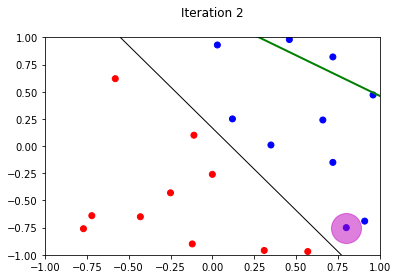

Updated weights:  [-6.36, -6.699999999999998]
Point 6:[0.46, 0.98, -1] Weights:[-6.36, -6.699999999999998] Correctly classified


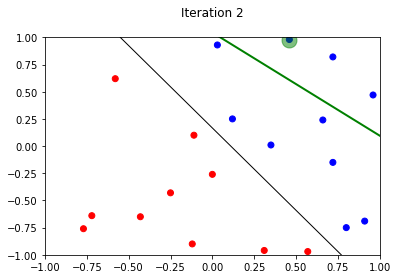

Point 7:[0.66, 0.24, -1] Weights:[-6.36, -6.699999999999998] Incorrectly classified


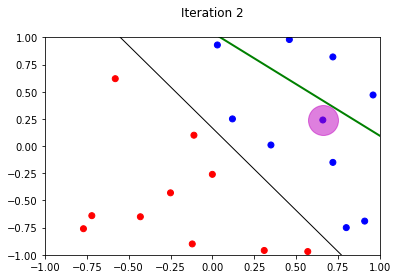

Updated weights:  [-7.0200000000000005, -6.939999999999999]
Point 8:[0.72, -0.15, -1] Weights:[-7.0200000000000005, -6.939999999999999] Correctly classified


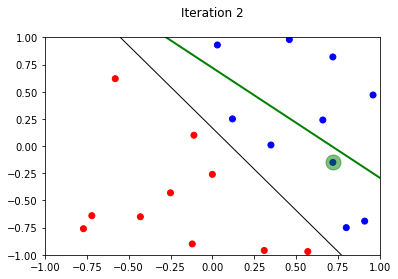

Point 9:[0.35, 0.01, -1] Weights:[-7.0200000000000005, -6.939999999999999] Incorrectly classified


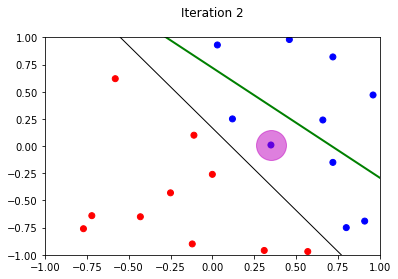

Updated weights:  [-7.37, -6.949999999999998]
Point 10:[-0.11, 0.1, 1] Weights:[-7.37, -6.949999999999998] Incorrectly classified


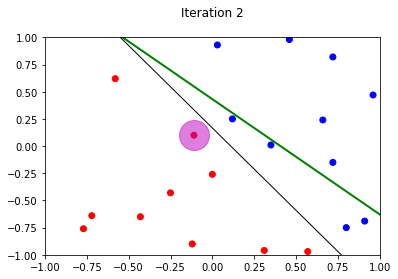

Updated weights:  [-7.48, -6.849999999999999]
Point 11:[0.31, -0.96, 1] Weights:[-7.48, -6.849999999999999] Incorrectly classified


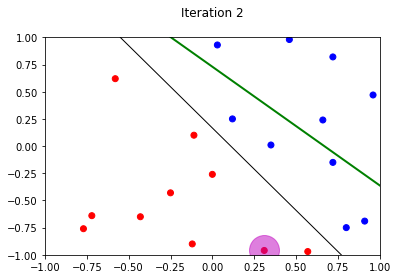

Updated weights:  [-7.170000000000001, -7.809999999999999]
Point 12:[0.0, -0.26, 1] Weights:[-7.170000000000001, -7.809999999999999] Incorrectly classified


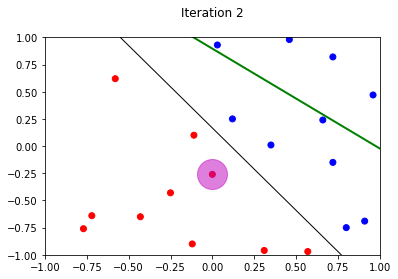

Updated weights:  [-7.170000000000001, -8.069999999999999]
Point 13:[-0.43, -0.65, 1] Weights:[-7.170000000000001, -8.069999999999999] Incorrectly classified


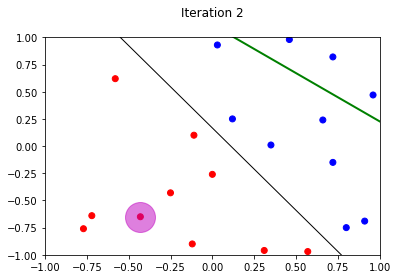

Updated weights:  [-7.6000000000000005, -8.719999999999999]
Point 14:[0.57, -0.97, 1] Weights:[-7.6000000000000005, -8.719999999999999] Incorrectly classified


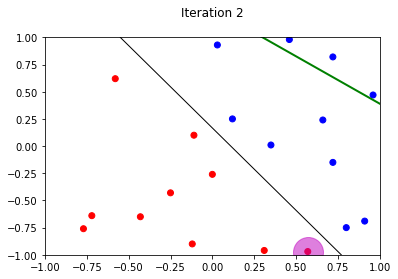

Updated weights:  [-7.03, -9.69]
Point 15:[-0.72, -0.64, 1] Weights:[-7.03, -9.69] Incorrectly classified


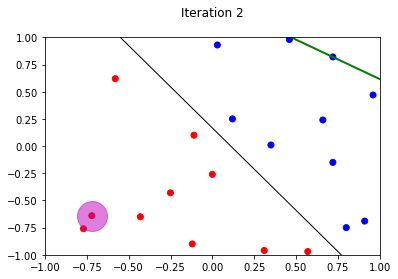

Updated weights:  [-7.75, -10.33]
Point 16:[-0.25, -0.43, 1] Weights:[-7.75, -10.33] Incorrectly classified


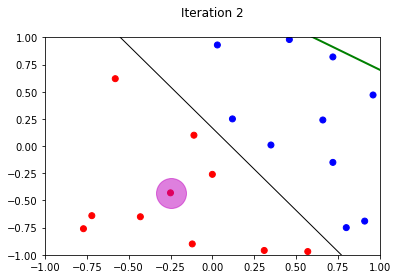

Updated weights:  [-8.0, -10.76]
Point 17:[-0.12, -0.9, 1] Weights:[-8.0, -10.76] Incorrectly classified


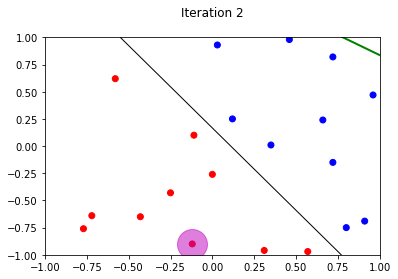

Updated weights:  [-8.12, -11.66]
Point 18:[-0.58, 0.62, 1] Weights:[-8.12, -11.66] Incorrectly classified


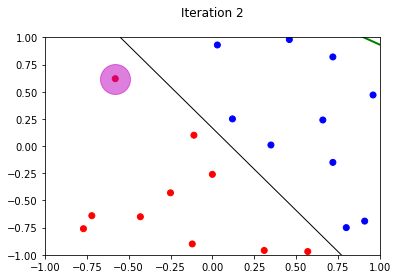

Updated weights:  [-8.7, -11.040000000000001]
Point 19:[-0.77, -0.76, 1] Weights:[-8.7, -11.040000000000001] Incorrectly classified


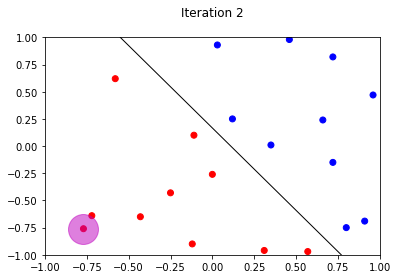

Updated weights:  [-9.469999999999999, -11.8]

---------------------------------------------------------------

Functionality not learned!

-----------------------------EPOCH3---------------------------------
Point 0:[0.72, 0.82, -1] Weights:[-9.469999999999999, -11.8] Incorrectly classified


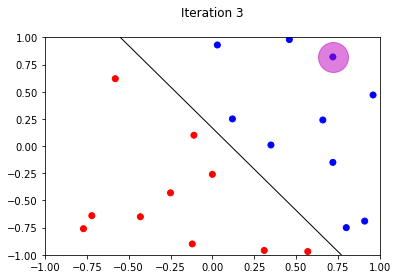

Updated weights:  [-10.19, -12.620000000000001]
Point 1:[0.91, -0.69, -1] Weights:[-10.19, -12.620000000000001] Incorrectly classified


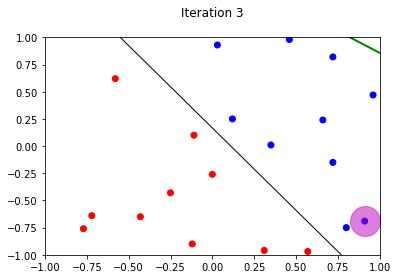

Updated weights:  [-11.1, -11.930000000000001]
Point 2:[0.03, 0.93, -1] Weights:[-11.1, -11.930000000000001] Incorrectly classified


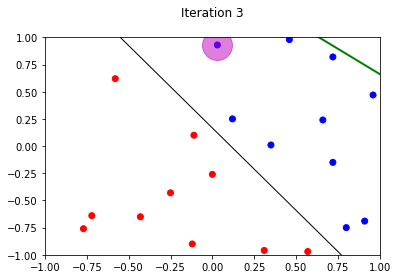

Updated weights:  [-11.129999999999999, -12.860000000000001]
Point 3:[0.12, 0.25, -1] Weights:[-11.129999999999999, -12.860000000000001] Incorrectly classified


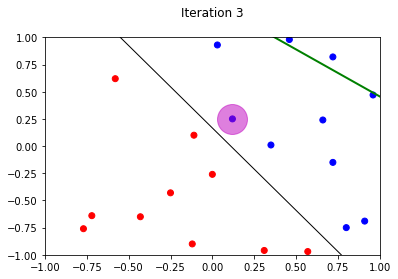

Updated weights:  [-11.249999999999998, -13.110000000000001]
Point 4:[0.96, 0.47, -1] Weights:[-11.249999999999998, -13.110000000000001] Correctly classified


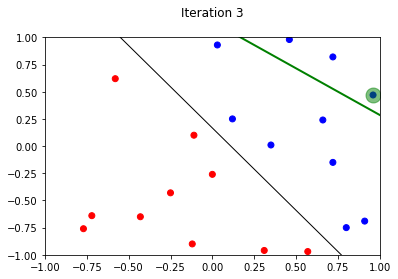

Point 5:[0.8, -0.75, -1] Weights:[-11.249999999999998, -13.110000000000001] Incorrectly classified


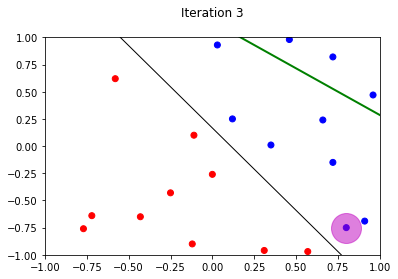

Updated weights:  [-12.049999999999999, -12.360000000000001]
Point 6:[0.46, 0.98, -1] Weights:[-12.049999999999999, -12.360000000000001] Correctly classified


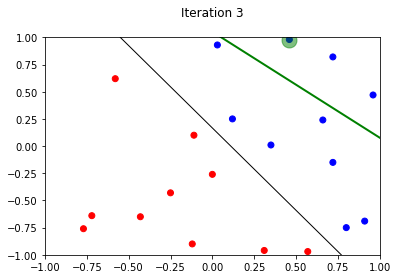

Point 7:[0.66, 0.24, -1] Weights:[-12.049999999999999, -12.360000000000001] Incorrectly classified


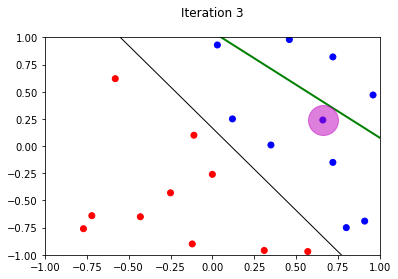

Updated weights:  [-12.709999999999999, -12.600000000000001]
Point 8:[0.72, -0.15, -1] Weights:[-12.709999999999999, -12.600000000000001] Incorrectly classified


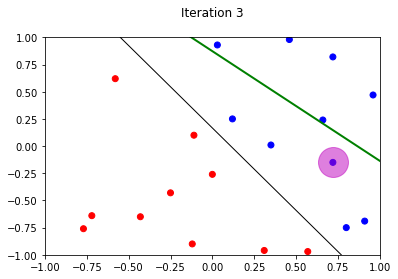

Updated weights:  [-13.43, -12.450000000000001]
Point 9:[0.35, 0.01, -1] Weights:[-13.43, -12.450000000000001] Incorrectly classified


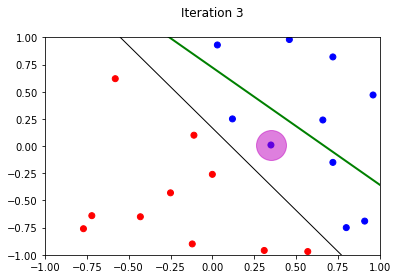

Updated weights:  [-13.78, -12.46]
Point 10:[-0.11, 0.1, 1] Weights:[-13.78, -12.46] Incorrectly classified


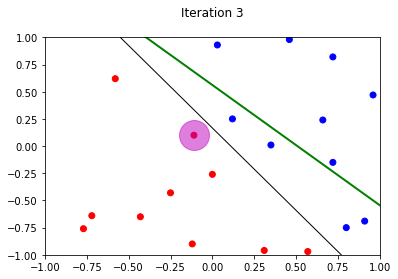

Updated weights:  [-13.889999999999999, -12.360000000000001]
Point 11:[0.31, -0.96, 1] Weights:[-13.889999999999999, -12.360000000000001] Incorrectly classified


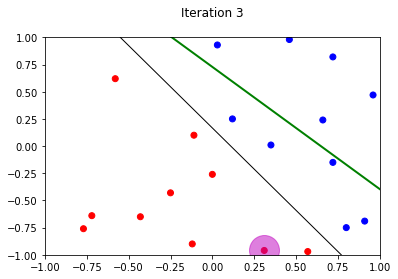

Updated weights:  [-13.579999999999998, -13.32]
Point 12:[0.0, -0.26, 1] Weights:[-13.579999999999998, -13.32] Incorrectly classified


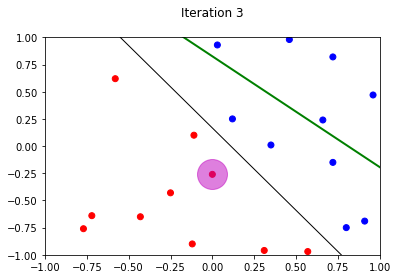

Updated weights:  [-13.579999999999998, -13.58]
Point 13:[-0.43, -0.65, 1] Weights:[-13.579999999999998, -13.58] Incorrectly classified


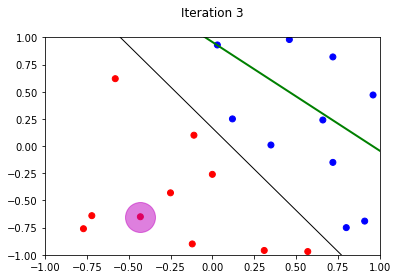

Updated weights:  [-14.009999999999998, -14.23]
Point 14:[0.57, -0.97, 1] Weights:[-14.009999999999998, -14.23] Incorrectly classified


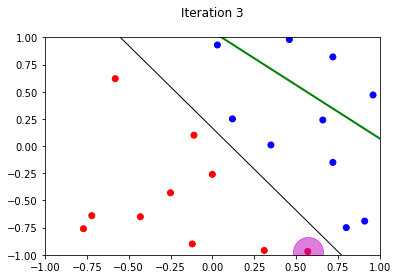

Updated weights:  [-13.439999999999998, -15.200000000000001]
Point 15:[-0.72, -0.64, 1] Weights:[-13.439999999999998, -15.200000000000001] Incorrectly classified


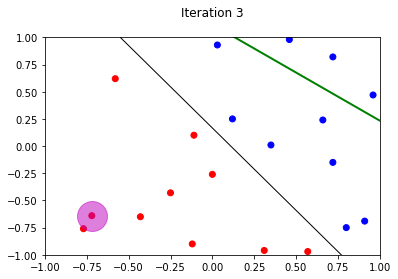

Updated weights:  [-14.159999999999998, -15.840000000000002]
Point 16:[-0.25, -0.43, 1] Weights:[-14.159999999999998, -15.840000000000002] Incorrectly classified


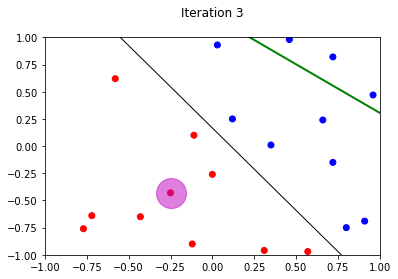

Updated weights:  [-14.409999999999998, -16.270000000000003]
Point 17:[-0.12, -0.9, 1] Weights:[-14.409999999999998, -16.270000000000003] Incorrectly classified


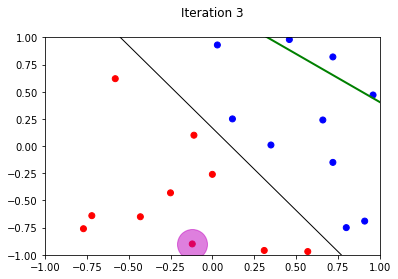

Updated weights:  [-14.529999999999998, -17.17]
Point 18:[-0.58, 0.62, 1] Weights:[-14.529999999999998, -17.17] Incorrectly classified


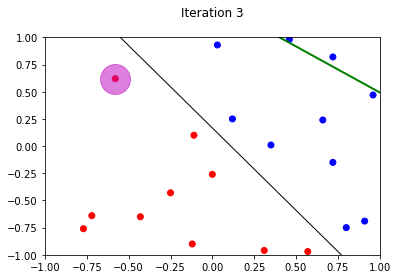

Updated weights:  [-15.109999999999998, -16.55]
Point 19:[-0.77, -0.76, 1] Weights:[-15.109999999999998, -16.55] Incorrectly classified


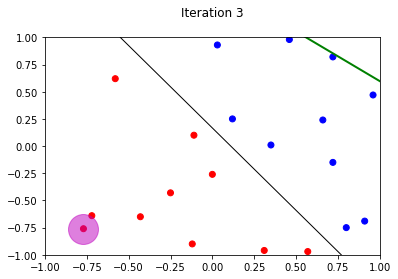

Updated weights:  [-15.879999999999997, -17.310000000000002]

---------------------------------------------------------------

Functionality not learned!

-----------------------------EPOCH4---------------------------------
Point 0:[0.72, 0.82, -1] Weights:[-15.879999999999997, -17.310000000000002] Incorrectly classified


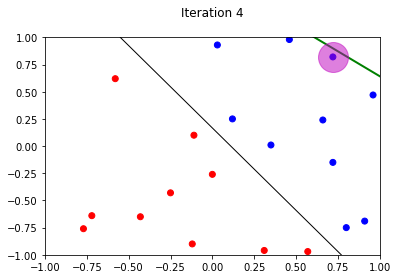

Updated weights:  [-16.599999999999998, -18.130000000000003]
Point 1:[0.91, -0.69, -1] Weights:[-16.599999999999998, -18.130000000000003] Incorrectly classified


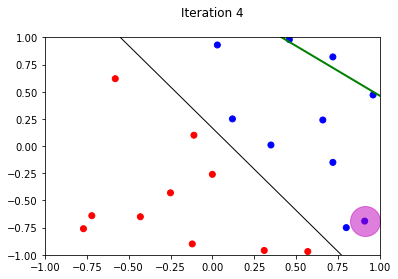

Updated weights:  [-17.509999999999998, -17.44]
Point 2:[0.03, 0.93, -1] Weights:[-17.509999999999998, -17.44] Incorrectly classified


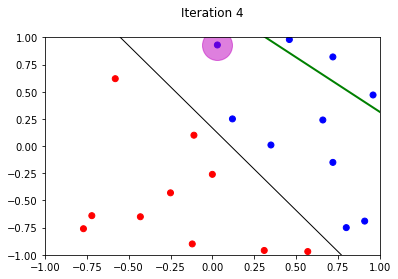

Updated weights:  [-17.54, -18.37]
Point 3:[0.12, 0.25, -1] Weights:[-17.54, -18.37] Incorrectly classified


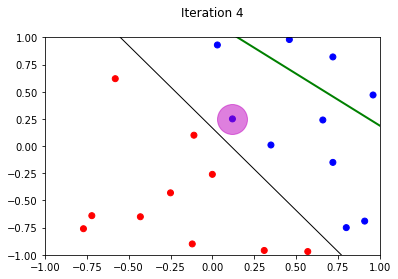

Updated weights:  [-17.66, -18.62]
Point 4:[0.96, 0.47, -1] Weights:[-17.66, -18.62] Correctly classified


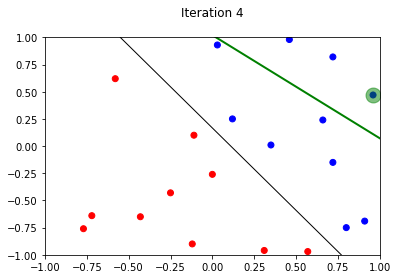

Point 5:[0.8, -0.75, -1] Weights:[-17.66, -18.62] Incorrectly classified


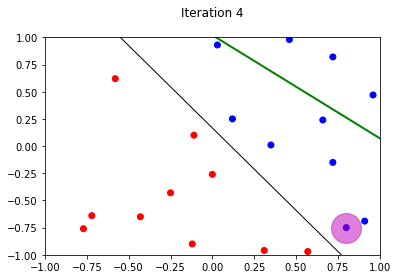

Updated weights:  [-18.46, -17.87]
Point 6:[0.46, 0.98, -1] Weights:[-18.46, -17.87] Correctly classified


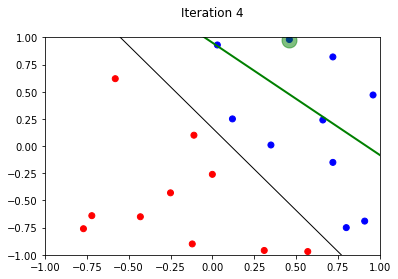

Point 7:[0.66, 0.24, -1] Weights:[-18.46, -17.87] Incorrectly classified


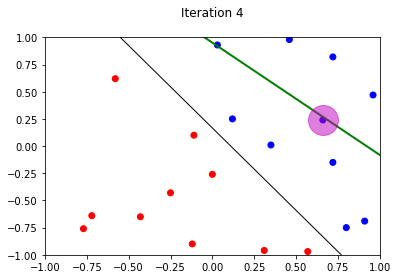

Updated weights:  [-19.12, -18.11]
Point 8:[0.72, -0.15, -1] Weights:[-19.12, -18.11] Incorrectly classified


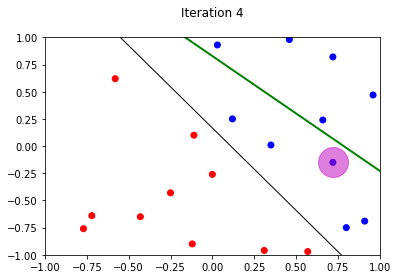

Updated weights:  [-19.84, -17.96]
Point 9:[0.35, 0.01, -1] Weights:[-19.84, -17.96] Incorrectly classified


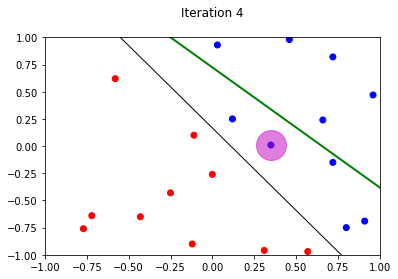

Updated weights:  [-20.19, -17.970000000000002]
Point 10:[-0.11, 0.1, 1] Weights:[-20.19, -17.970000000000002] Incorrectly classified


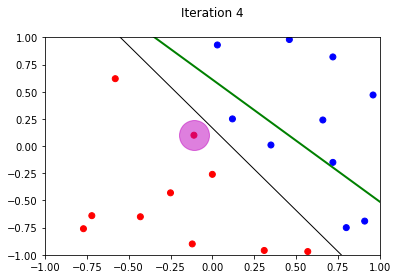

Updated weights:  [-20.3, -17.87]
Point 11:[0.31, -0.96, 1] Weights:[-20.3, -17.87] Incorrectly classified


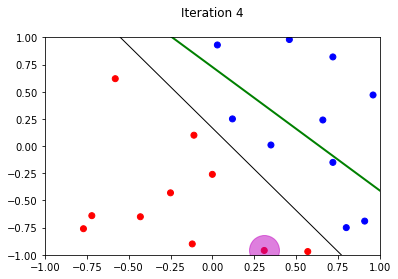

Updated weights:  [-19.990000000000002, -18.830000000000002]
Point 12:[0.0, -0.26, 1] Weights:[-19.990000000000002, -18.830000000000002] Incorrectly classified


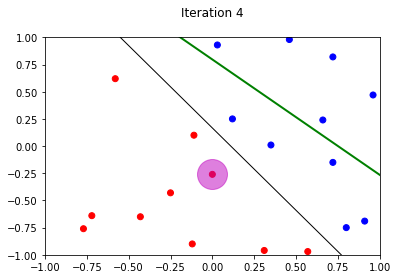

Updated weights:  [-19.990000000000002, -19.090000000000003]
Point 13:[-0.43, -0.65, 1] Weights:[-19.990000000000002, -19.090000000000003] Incorrectly classified


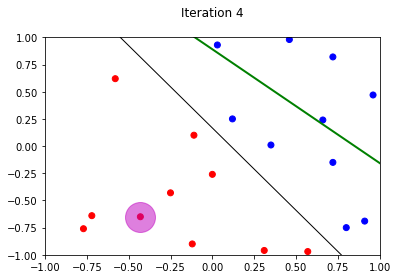

Updated weights:  [-20.42, -19.740000000000002]
Point 14:[0.57, -0.97, 1] Weights:[-20.42, -19.740000000000002] Incorrectly classified


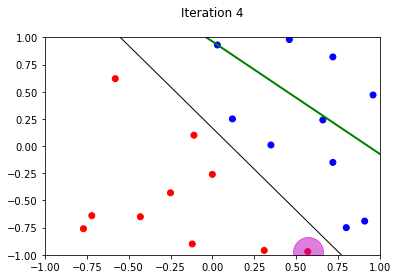

Updated weights:  [-19.85, -20.71]
Point 15:[-0.72, -0.64, 1] Weights:[-19.85, -20.71] Incorrectly classified


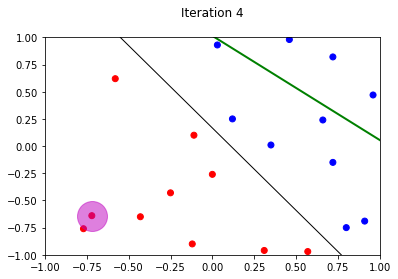

Updated weights:  [-20.57, -21.35]
Point 16:[-0.25, -0.43, 1] Weights:[-20.57, -21.35] Incorrectly classified


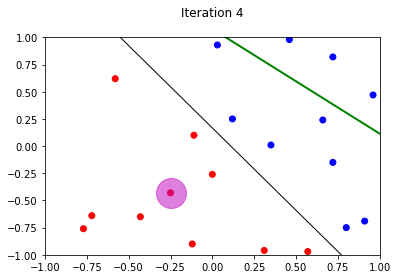

Updated weights:  [-20.82, -21.78]
Point 17:[-0.12, -0.9, 1] Weights:[-20.82, -21.78] Incorrectly classified


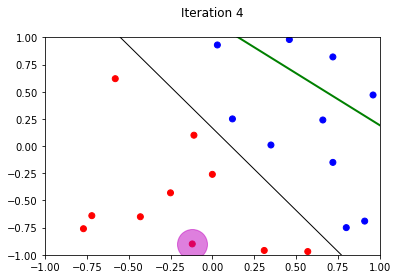

Updated weights:  [-20.94, -22.68]
Point 18:[-0.58, 0.62, 1] Weights:[-20.94, -22.68] Incorrectly classified


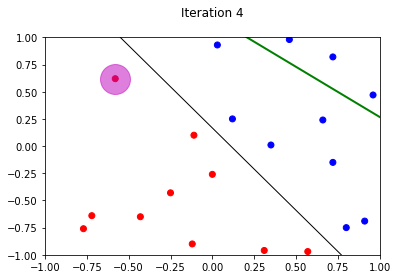

Updated weights:  [-21.52, -22.06]
Point 19:[-0.77, -0.76, 1] Weights:[-21.52, -22.06] Incorrectly classified


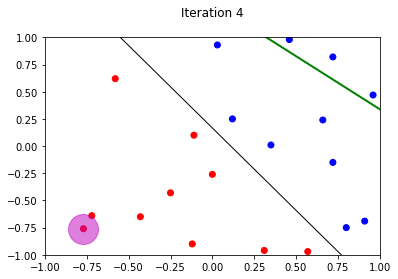

Updated weights:  [-22.29, -22.82]

---------------------------------------------------------------

Functionality learned with 4 iterations!

Done!



In [57]:
for k in range(1,max_epochs):
    hit = 0
    print("\n-----------------------------EPOCH"+str(k)+ "---------------------------------")
    for i in range(0,len(x)):
        correctlyPredicted = False
        printStr = "Point "+ str(i) + ":" +str(x[i]) + " Weights:"+str(w)
        y = predict(x[i], w, bias, threshold)
        #  x[0] = [0.72,0.82,-1]
        # Update the Weights if the output does not match with the Desired output
        if y == x[i][2]:  # x[0][2]
            hits += 1
            correctlyPredicted = True   
            print(printStr + " Correctly classified")
            if needplot:
                createPlot(x[i], w, bias, correctlyPredicted)
        else:
            print(printStr + " Incorrectly classified")
            if needplot:
                createPlot(x[i], w, bias, correctlyPredicted)
            w, bias = updateweights(x[i], w, bias)
            print('Updated weights: ', str(w))

    if hits == len(x):
        print("\n---------------------------------------------------------------")
        print("\nFunctionality learned with "+str(k)+" iterations!")
        break;
    else:
        print("\n---------------------------------------------------------------")
        print("\nFunctionality not learned!")

print("\nDone!\n")